In [25]:
import pandas as pd

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
import pickle

In [28]:
df = pickle.load(open('pkl/allyears_clean','rb'))

In [29]:
stats = pickle.load(open('pkl/player_stats','rb'))

In [30]:
stats.head()

,Player,Team,Smp,Swin,Sloss,Swl,Spct,Dmp,Dwin,Dloss,Dwl,Dpct,Twl,Trwl,Cmp,Cwin,Closs,Cwl,Cpct
0,Johnny Archer,America,30,17,13,17-13,56.67,50,27,23,27-23,54.00,5-4,1-1,91,50,41,50-41,54.95
1,Earl Strickland,America,26,14,12,14-12,53.85,36,24,12,24-12,66.67,3-2,2-0,69,43,26,43-26,62.32
2,Rodney Morris,America,18,10,8,10-8,55.56,29,12,17,12-17,41.38,3-5,2-0,57,27,30,27-30,47.37
3,Shane Van Boening,America,25,10,15,10-15,40.00,25,11,14,11-14,44.00,4-6,0-0,60,25,35,25-35,41.67
4,Corey Deuel,America,13,7,6,7-6,53.85,25,13,12,13-12,52.00,5-2,2-0,47,27,20,27-20,57.45


In [35]:
stats.sort_values('Cmp',ascending=False)

,Player,Team,Smp,Swin,Sloss,Swl,Spct,Dmp,Dwin,Dloss,Dwl,Dpct,Twl,Trwl,Cmp,Cwin,Closs,Cwl,Cpct
0,Johnny Archer,America,30,17,13,17-13,56.67,50,27,23,27-23,54.00,5-4,1-1,91,50,41,50-41,54.95
40,Ralf Souquet,Europe,33,20,13,20-13,60.61,44,27,17,27-17,61.36,4-4,1-1,87,52,35,52-35,59.77
41,Mika Immonen,Europe,33,16,17,16-17,48.48,39,22,17,22-17,56.41,3-3,1-1,80,42,38,42-38,52.50
1,Earl Strickland,America,26,14,12,14-12,53.85,36,24,12,24-12,66.67,3-2,2-0,69,43,26,43-26,62.32
42,Niels Feijen,Europe,20,12,8,12-8,60.00,33,24,9,24-9,72.73,5-4,0-0,62,41,21,41-21,66.13
3,Shane Van Boening,America,25,10,15,10-15,40.00,25,11,14,11-14,44.00,4-6,0-0,60,25,35,25-35,41.67
2,Rodney Morris,America,18,10,8,10-8,55.56,29,12,17,12-17,41.38,3-5,2-0,57,27,30,27-30,47.37
43,Steve Davis,Europe,27,14,13,14-13,51.85,25,8,17,8-17,32.00,0-0,0-0,52,22,30,22-30,42.31
4,Corey Deuel,America,13,7,6,7-6,53.85,25,13,12,13-12,52.00,5-2,2-0,47,27,20,27-20,57.45
45,Darren Appleton,Europe,14,10,4,10-4,71.43,25,10,15,10-15,40.00,5-3,0-0,47,25,22,25-22,53.19


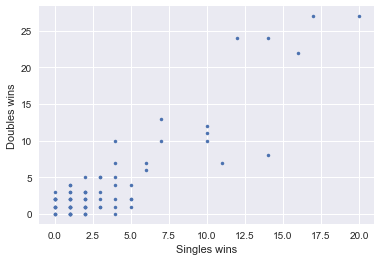

In [32]:
plt.plot(stats['Swin'],stats['Dwin'],linestyle='none',marker='.')
plt.xlabel('Singles wins')
plt.ylabel('Doubles wins')